# Example Playwright Automation in Jupyter Notebook


* create a node project for the playwright notebook
    * make folder and cd into it
    * npm init -y
    * npm install playwright
    * npx playwright install


### To Do

* Image Comparisons
  * https://playwright.dev/docs/api/class-snapshotassertions
  * https://playwright.dev/docs/test-snapshots
* API Testing
* It is reasonable to organize test suites in one or multiple notebooks?
* Can the execution and exporting of a notebook be automated via a pipeline?
* This implementation will leave the browser open when there is an error. Useful for debugging tests but not so useful if i can be run unsupervised in a pipeline.

## Thoughts so far

* a good tool for documenting exploratory testing.
* provides built in documentation of the test and results which are easily shared
* help someone learn to use playwright will out all of the nodejs ceremony
* could be an outright replacement for tools like Postman for API testing
* act as a mechanism for introducing someone to automated testing concepts and strategies
* likely not useful for significant amounts of test automation due to
  * purely linear nature of a notebook
  * likely need of many notebooks for a suite of tests
* there does not appear to be something akin to before, after, beforeall, afterall

### Import needed types

In [1]:
import fs from "fs";
import * as tslab from "tslab";
import { chromium, Browser, Page } from 'playwright';

### Define constants for reuse

In [2]:
const FOOTER_SCREENSHOT: string = 'screenshots/footer.png'
const TODO_SCREENSHOT: string = 'screenshots/todos.png'
const URL: string = 'https://example.cypress.io/todo'

const FOOTER_LOCATOR: string = '.footer'
const COOKIE_CONFIRMATION_ACCEPT_BUTTON_LOCATOR: string = '#hs-eu-confirmation-button'


### Clean up any existing image files

In [3]:
removeFileIfExists(FOOTER_SCREENSHOT)
removeFileIfExists(TODO_SCREENSHOT)

function removeFileIfExists(file: string){
    if(fs.existsSync(file)){
        console.log(`remove file: ${file}`)
        fs.unlinkSync(file)
    }
}


### Open the browser so that it is visible to the user

In [4]:
const browser: Browser = await chromium.launch({ headless: false });
const page: Page = await browser.newPage();

### Execute the Playwright script

In [5]:
console.log("Running...")

console.log(`navigating to ${URL}`)
await page.goto(URL);

console.log("capture footer...")
await page.locator(FOOTER_LOCATOR)
  .screenshot({ path: FOOTER_SCREENSHOT })

//throw new Error("Example or an error")

console.log("capture todos app...")
await page.screenshot({ path: TODO_SCREENSHOT });

console.log("...Done")

Running...
navigating to https://example.cypress.io/todo
capture footer...
capture todos app...
...Done


### Close Browser

In [6]:
await browser.close();

### Page screenshot

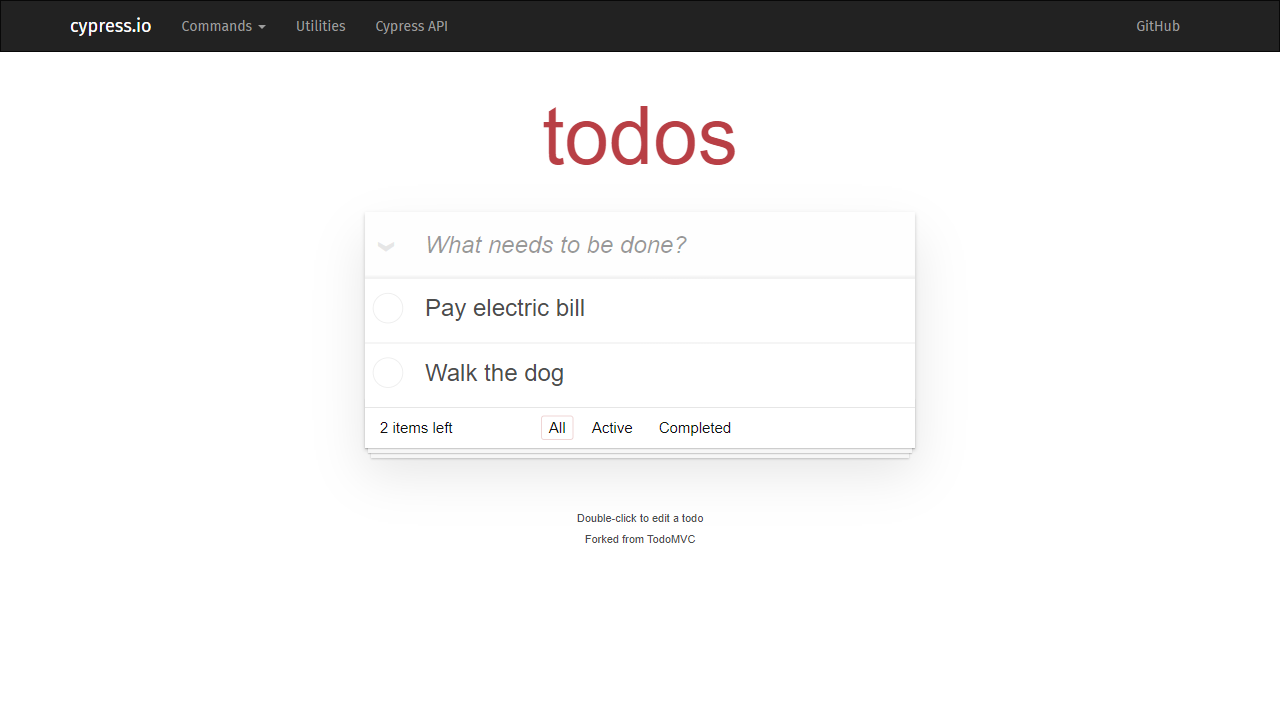

In [7]:
tslab.display.png(fs.readFileSync(TODO_SCREENSHOT))

### Footer screenshot

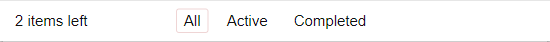

In [8]:
tslab.display.png(fs.readFileSync(FOOTER_SCREENSHOT))